In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf 

In [2]:
cc=pd.read_excel('/Users/pratikgade123/Desktop/Pandas/CocaCola_Sales_Rawdata.xlsx')

In [3]:
cc

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
cc.shape

(42, 2)

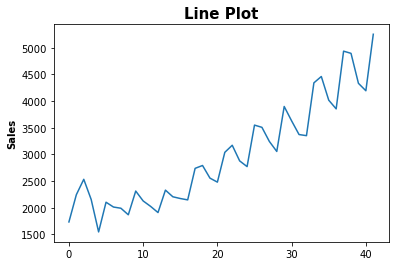

In [7]:
plt.title("Line Plot", size = 15, weight = 'bold')
plt.ylabel("Sales", size = 10, weight = 'bold')
plt.plot(cc['Sales'])

In [8]:
quarters = ['Q1','Q2','Q3','Q4']
n = cc['Quarter'][0]
n[0:2]

'Q1'

In [9]:
cc['quarter'] = 0
for i in range(42):
    n = cc['Quarter'][i]
    cc['quarter'][i] = n[0:2]

/var/folders/2n/z9t2ky8x68xdlptvrbn2mq_80000gn/T/ipykernel_58697/3168721913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc['quarter'][i] = n[0:2]
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
dummy = pd.DataFrame(pd.get_dummies(cc['quarter']))


In [11]:
dummy


,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [12]:
cc_c=pd.concat([cc,dummy],axis=1)


In [13]:
cc_c

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [15]:
cc_c["t"] = np.arange(1,43)


In [41]:
cc_c["t_squared"] = cc_c["t"]*cc_c["t"]
cc_c.columns
cc_c["log_Sales"] = np.log(cc_c["Sales"])


In [42]:
cc_c

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


<AxesSubplot:xlabel='quarter', ylabel='Quarter'>

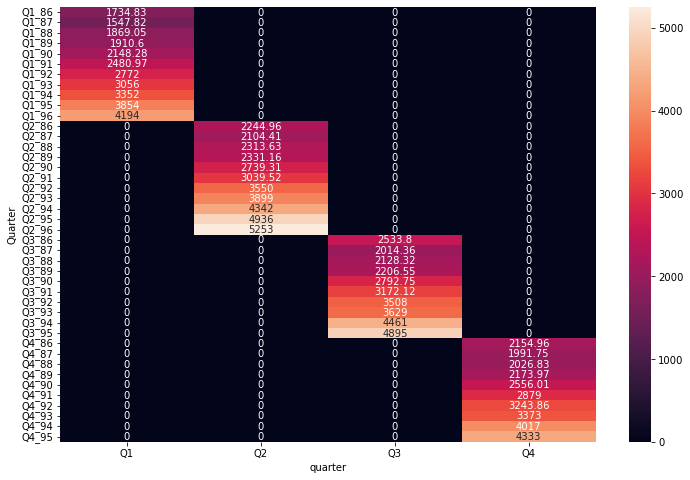

In [47]:
plt.figure(figsize=(12,8))
heatmap_y_quarter = pd.pivot_table(data=cc_c,values="Sales",index="Quarter",columns="quarter",aggfunc="mean", fill_value = 0)
sns.heatmap(heatmap_y_quarter,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='quarter', ylabel='Sales'>

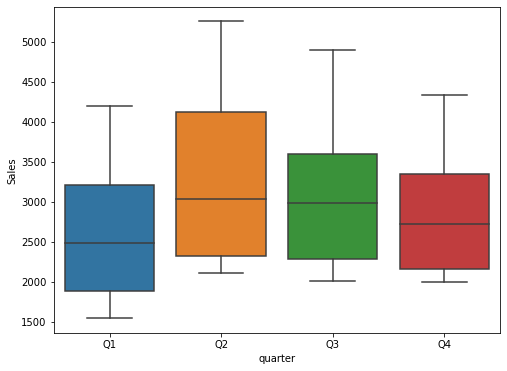

In [48]:
# Boxplot for ever
plt.figure(figsize=(8,6))
sns.boxplot(x="quarter",y="Sales",data=cc_c)

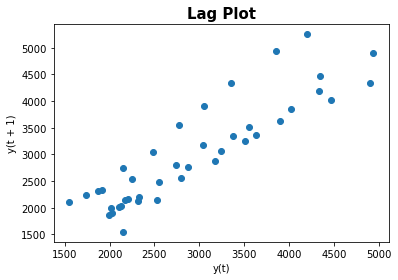

In [54]:
lag_plot(cc_c['Sales'])
plt.title("Lag Plot", size = 15, weight = "bold")
plt.show()

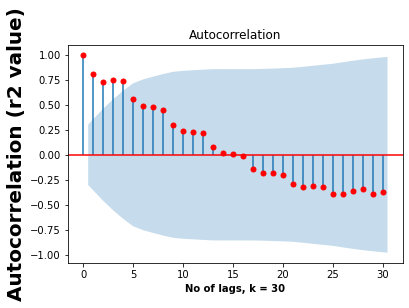

In [56]:
plot_acf(cc_c['Sales'], lags = 30, color = 'red')               # lags = 30 means it will plot for k = 30 lags 
plt.xlabel("No of lags, k = 30", size = 10, weight = 'bold')
plt.ylabel("Autocorrelation (r2 value)", size = 20, weight = 'bold')
plt.show()

<AxesSubplot:xlabel='quarter', ylabel='Sales'>

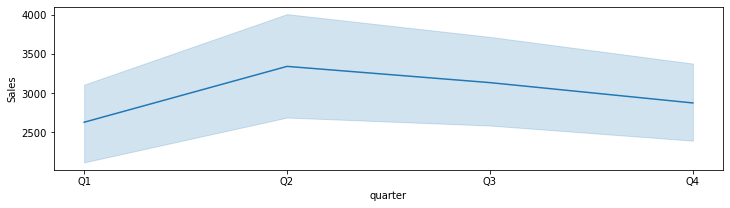

In [57]:
plt.figure(figsize=(12,3))
sns.lineplot(x="quarter",y="Sales",data=cc_c)

In [58]:
train =cc_c.head(37)
test  =cc_c.tail(4)

In [59]:
train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [60]:
test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


In [61]:
import statsmodels.formula.api as smf 

In [65]:
linear = smf.ols('Sales~t',data=train).fit()
pred_linear =  pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

671.6427504390408

In [66]:
Quad = smf.ols('Sales~t+t_squared',data=train).fit() #quadratic model
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
print("Root Mean Square Error : ",rmse_Quad)

Root Mean Square Error :  424.2400896279165


In [67]:
Exp = smf.ols('log_Sales~t',data=train).fit() #exponential model
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Exp)))**2))
print("Root Mean Square Error : ",rmse_Exp)

Root Mean Square Error :  513.4107967980989


In [71]:
# additive seasonality with linear treand
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit() #additive seasonality model
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
print("Root Mean Square Error : ",rmse_add_sea)


Root Mean Square Error :  1917.8628612596374


In [72]:
# additive seasonality with quadratic trend
add_sea_quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=train).fit() #additive seasonality qudratic model
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test[['t','t_squared','Q1','Q2','Q3','Q4']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
print("Root Mean Square Error : ",rmse_add_sea_quad)

Root Mean Square Error :  265.82796918594636


In [73]:
#multiplicative seasonality
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = train).fit() #multiplicative seasonality model
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
print("Root Mean Square Error : ",rmse_Mult_sea)

Root Mean Square Error :  2010.119432504081


In [74]:
#multiplicative additive seasonality
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = train).fit() #multiplicative additive seasonality
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("Root Mean Square Error : ",rmse_Mult_add_sea) 

Root Mean Square Error :  262.49584669466196


In [75]:
#tabuling rmes value
Final_data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
Final_result = pd.DataFrame(Final_data) #data frame of final result
Final_result.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,262.495847
4,rmse_add_sea_quad,265.827969
2,rmse_Quad,424.240090
1,rmse_Exp,513.410797
0,rmse_linear,671.642750
3,rmse_add_sea,1917.862861
5,rmse_Mult_sea,2010.119433


In [76]:
data_precict=pd.read_excel('/Users/pratikgade123/Desktop/Pandas/CocaCola_Sales_Rawdata.xlsx')

In [77]:
Final_pred = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=cc_c).fit()

In [78]:
pred_new  = pd.Series(Final_pred.predict(cc_c))

In [79]:
pred_new

0     7.339224
1     7.579747
2     7.571328
3     7.491254
4     7.435892
5     7.676415
6     7.667996
7     7.587922
8     7.532561
9     7.773084
10    7.764665
11    7.684591
12    7.629229
13    7.869752
14    7.861333
15    7.781259
16    7.725898
17    7.966421
18    7.958002
19    7.877928
20    7.822566
21    8.063089
22    8.054670
23    7.974596
24    7.919235
25    8.159758
26    8.151339
27    8.071265
28    8.015903
29    8.256426
30    8.248007
31    8.167933
32    8.112572
33    8.353095
34    8.344676
35    8.264602
36    8.209240
37    8.449763
38    8.441344
39    8.361270
40    8.305909
41    8.546432
dtype: float64